<a href="https://colab.research.google.com/github/qqto2008/capstone/blob/master/OCT_CRX_prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset access

## 1.1 Get dataset

IMPORTANT! This dataset is Labelled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification (OCT-CXR) , which is "chest_xray.zip". Please place the "chest_xray.zip" file in the same folder of the .ipynb file.

OR the dataset can be loaded in Google Colab by the following code.

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file   
id='1J739AyasAsMc258PELJY1MwqfDoPSXxG'
downloaded = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
downloaded.GetContentFile('chest_xray.zip')  

## 1.2 Unzip the dataset

In [0]:
# unzip the data

import zipfile

myzip = zipfile.ZipFile('chest_xray.zip')
myzip.extractall( )



In [0]:
#myzip.infolist()

#2. Preprocess data

## 2.1 Add labels to images

In [0]:
import matplotlib.pyplot as plt

import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [0]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [13]:
train = get_training_data('./chest_xray/train')
test = get_training_data('./chest_xray/test')
val = get_training_data('./chest_xray/val')
print(len(train))
print(len(test))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

5216
624


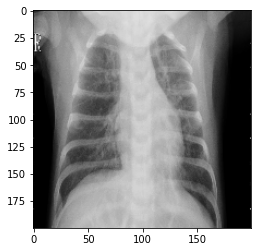

In [14]:
plt.imshow(train[10][0], cmap='gray')

In [0]:
#get shuffled data
np.random.shuffle(train)

np.random.shuffle(test)

np.random.shuffle(val)

##2.2 Resize the Dataset

In [0]:
train_X = []
train_y = [] 
test_X = []
test_y = []

for feature, label in train:
    train_X.append(feature)
    train_y.append(label)

for feature, label in test:
    test_X.append(feature)
    test_y.append(label)
    
for feature, label in val:
    train_X.append(feature)
    train_y.append(label)
    
# resize data for modeling 
train_X = np.array(train_X).reshape(-1, img_size, img_size, 1)
train_y = np.array(train_y)
test_X = np.array(test_X).reshape(-1, img_size, img_size, 1)
test_y = np.array(test_y)

In [0]:
train_X = train_X / 255
test_X = test_X / 255